In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 图像退化和复原

## 高斯噪声

https://blog.csdn.net/wzy628810/article/details/103807829

>numpy.random.normal(loc=0.0, scale=1.0, size=None)
>
>从正态（高斯）分布中抽取随机样本。

In [2]:
def gaussian_noise(img,mean,sigma):
    '''
    mean:均值
    sigma:方差
    '''
    
    #将图片标准化
    img=img/255
    #产生高斯噪声
    noise=np.random.normal(mean,sigma,img.shape)
    #将噪声和图片叠加
    gaussian_out=img+noise
    #截断，将超过1的置为1；小于0的置为0
    gaussian_out=np.clip(gaussian_out,0,1)
    #恢复0-255的范围
    gaussian_out=np.uint8(gaussian_out*255)
    return gaussian_out,noise

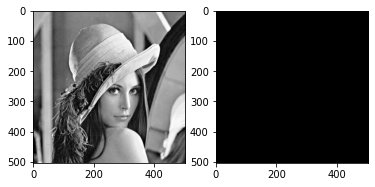

In [3]:
lena=cv2.imread('./images/lenna.png',cv2.IMREAD_GRAYSCALE)
#lena.shape

mean=0
sigma=0.0

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

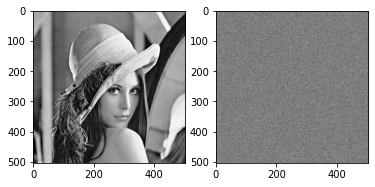

In [4]:
mean=0
sigma=0.003

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

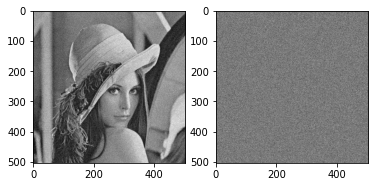

In [5]:
mean=0
sigma=0.06

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

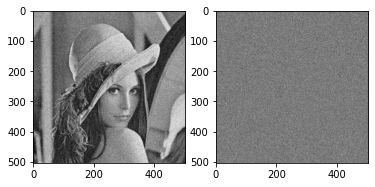

In [6]:
mean=0
sigma=0.09

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

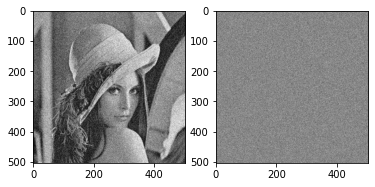

In [7]:
mean=0
sigma=0.12

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

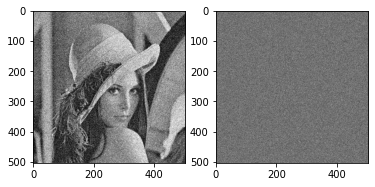

In [8]:
mean=0
sigma=0.15

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

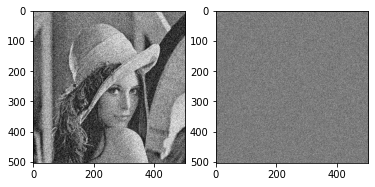

In [9]:
mean=0
sigma=0.18

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

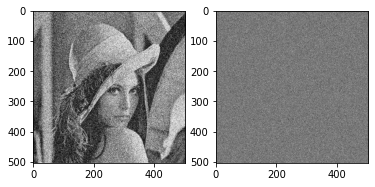

In [10]:
mean=0
sigma=0.21

gaussian_out,noise=gaussian_noise(lena,mean,sigma)
plt.subplot(1,2,1)
plt.imshow(gaussian_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

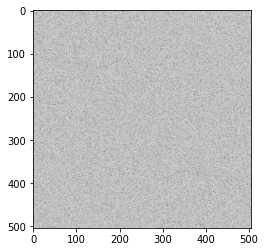

In [11]:
noise_dft=cv2.dft(np.float32(noise),flags=cv2.DFT_COMPLEX_OUTPUT)
noise_dft_shift=np.fft.fftshift(noise_dft)
magnitude_spactrum=20*np.log(cv2.magnitude(noise_dft_shift[:,:,0],noise_dft_shift[:,:,1]))
#cv2.normalize也可以归一化
plt.imshow(np.abs(magnitude_spactrum),cmap='gray')
plt.show()

## 脉冲噪声(椒盐噪声)

In [12]:
def saltpepper_noise(image,proportion):
    '''
    proportion:噪声比例
    '''
    image_copy=image.copy()
    h,w=image.shape
    #噪声点的X坐标
    X=np.random.randint(h,size=(int(proportion*h*w),))
    #噪声点的Y坐标
    Y=np.random.randint(w,size=(int(proportion*h*w),))
    #噪声点的坐标幅值
    image_copy[Y,X]=np.random.choice([0,255],size=(int(proportion*h*w),))
    #噪声容器,127是为了选一个适中的背景
    sp_noise_plate=np.ones_like(image_copy)*127
    #将噪声给噪声容器
    sp_noise_plate[Y,X]=image_copy[Y,X]
    return image_copy,sp_noise_plate

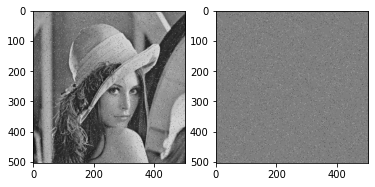

In [13]:
proportion=0.03

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

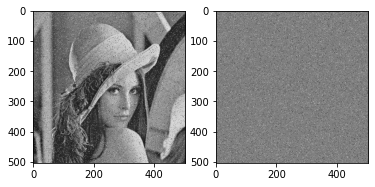

In [14]:
proportion=0.06

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

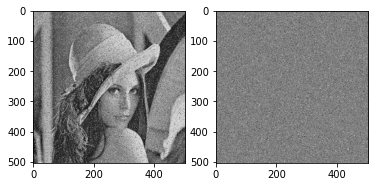

In [15]:
proportion=0.09

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

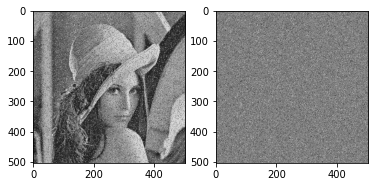

In [16]:
proportion=0.12

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

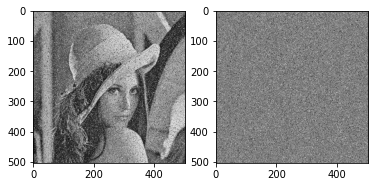

In [17]:
proportion=0.15

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

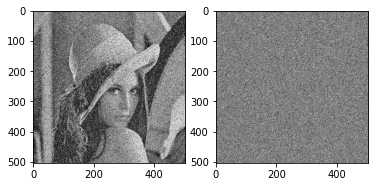

In [18]:
proportion=0.18

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

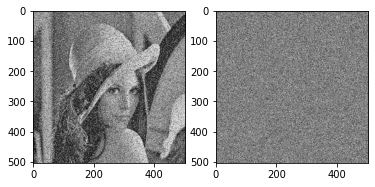

In [19]:
proportion=0.21

image_out,noise=saltpepper_noise(lena,proportion)
plt.subplot(1,2,1)
plt.imshow(image_out,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(noise,cmap='gray')
plt.show()

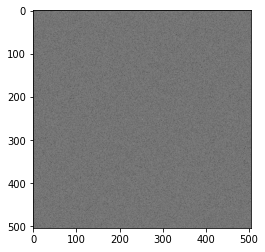

In [20]:
noise_dft=cv2.dft(np.float32(noise),flags=cv2.DFT_COMPLEX_OUTPUT)
noise_dft_shift=np.fft.fftshift(noise_dft)
magnitude_spactrum=20*np.log(cv2.magnitude(noise_dft_shift[:,:,0],noise_dft_shift[:,:,1]))
#cv2.normalize也可以归一化
plt.imshow(np.abs(magnitude_spactrum),cmap='gray')
plt.show()

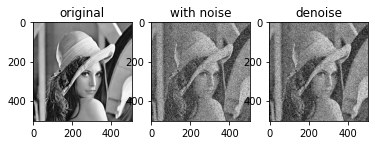

In [59]:
#算术均值滤波器-椒盐噪声
def ArithmeticMeanOperator(roi):
    return np.mean(roi)
def ArithmeticMeanAlogrithm(image,kernel_size):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_DEFAULT)
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=ArithmeticMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2])
    #new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)

proportion=0.30
kernel_size=3
lena_noise,noise=saltpepper_noise(lena,proportion)
lena_out=ArithmeticMeanAlogrithm(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

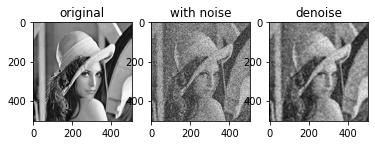

In [61]:
#算术均值滤波器-高斯噪声
def ArithmeticMeanOperator(roi):
    return np.mean(roi)
def ArithmeticMeanAlogrithm(image,kernel_size):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_DEFAULT)
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=ArithmeticMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2])
    #new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


kernel_size=8

mean=0
sigma=0.44

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=ArithmeticMeanAlogrithm(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
E:\Anaconda\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


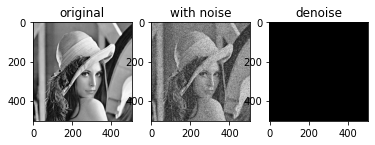

In [62]:
#几何均值滤波器-椒盐噪声
def GeometricMeanOperator(roi):
    roi=roi.astype(np.float64)
    #计算所有元素的乘积,对于有多个维度的数组可以指定轴，如axis=1指定计算每一行的乘积。
    p=np.prod(roi)
    return p**(1/(roi.shape[0]*roi.shape[1]))
def GeometricMeanAlogrithm(image,kernel_size):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_DEFAULT)
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=GeometricMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2])
    #new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)

proportion=0.18
kernel_size=14
lena_noise,noise=saltpepper_noise(lena,proportion)
lena_out=GeometricMeanAlogrithm(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

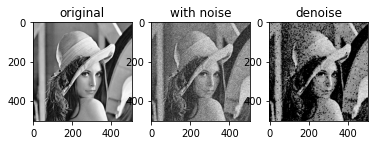

In [65]:
#几何均值滤波器-高斯噪声
def GeometricMeanOperator(roi):
    roi=roi.astype(np.float64)
    #计算所有元素的乘积,对于有多个维度的数组可以指定轴，如axis=1指定计算每一行的乘积。
    p=np.prod(roi)
    return p**(1/(roi.shape[0]*roi.shape[1]))
def GeometricMeanAlogrithm(image,kernel_size):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_DEFAULT)
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=GeometricMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2])
    #new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


kernel_size=4
mean=0
sigma=0.21

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=GeometricMeanAlogrithm(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


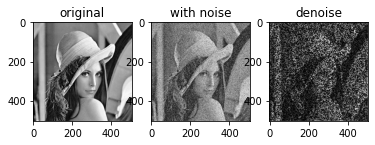

In [25]:
#几何均值滤波器-其他实现-椒盐噪声

def G_mean(img,kernel_size):
 
    G_mean_img = np.ones(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        G_mean_img[i][j] *=np.float(img[i-k+n][j-k+m])
                G_mean_img[i][j] = pow(G_mean_img[i][j],1/(kernel_size*kernel_size))
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img

proportion=0.18
kernel_size=3
lena_noise,noise=saltpepper_noise(lena,proportion)
lena_out=G_mean(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


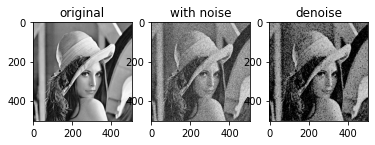

In [26]:
#几何均值滤波器-其他实现-高斯噪声

def G_mean(img,kernel_size):
 
    G_mean_img = np.ones(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        G_mean_img[i][j] *=np.float(img[i-k+n][j-k+m])
                G_mean_img[i][j] = pow(G_mean_img[i][j],1/(kernel_size*kernel_size))
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img


kernel_size=3
mean=0
sigma=0.21

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=G_mean(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

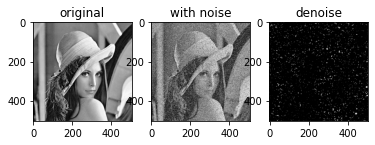

In [67]:
#谐波均值滤波器-椒盐噪声

def HMeanOperator(roi):
    from scipy import stats
    roi=roi.astype(np.float64)
    if 0 in roi:
        roi=0
    else:
        roi=stats.hmean(roi.reshape(-1))
    return roi
def HMeanAlogrithm(image,kernel_size):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=HMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2])
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)

proportion=0.18
kernel_size=6
lena_noise,noise=saltpepper_noise(lena,proportion)
lena_out=HMeanAlogrithm(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

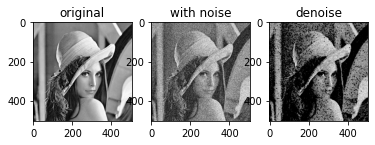

In [69]:
#谐波均值滤波器-高斯噪声

def HMeanOperator(roi):
    from scipy import stats
    roi=roi.astype(np.float64)
    if 0 in roi:
        roi=0
    else:
        roi=stats.hmean(roi.reshape(-1))
    return roi
def HMeanAlogrithm(image,kernel_size):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=HMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2])
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


kernel_size=4
mean=0
sigma=0.21

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=HMeanAlogrithm(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


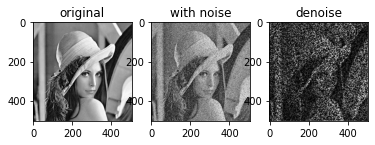

In [29]:
#谐波均值滤波器-其他实现-椒盐噪声
def H_mean(img,kernel_size):
 
    G_mean_img = np.zeros(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        if img[i-k+n][j-k+m] ==0:
                            G_mean_img[i][j] = 0
                            break
                        else:
                            G_mean_img[i][j] +=1/np.float(img[i-k+n][j-k+m])
                    else:
                        continue
                    break
                if G_mean_img[i][j]!=0:
                    G_mean_img[i][j] = (kernel_size*kernel_size)/G_mean_img[i][j]
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img
proportion=0.18
kernel_size=3
lena_noise,noise=saltpepper_noise(lena,proportion)
lena_out=H_mean(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


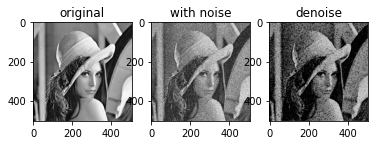

In [30]:
#谐波均值滤波器-其他实现-高斯噪声
def H_mean(img,kernel_size):
 
    G_mean_img = np.zeros(img.shape)
    #print(G_mean_img[0][0])
 
    #print(img)
    k = int((kernel_size-1)/2)
    #print(k)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i <k or i>(img.shape[0]-k-1) or j <k or j>(img.shape[1]-k-1):
                G_mean_img[i][j]=img[i][j]
            else:
                for n in range(kernel_size):
                    for m in range(kernel_size):
                        if img[i-k+n][j-k+m] ==0:
                            G_mean_img[i][j] = 0
                            break
                        else:
                            G_mean_img[i][j] +=1/np.float(img[i-k+n][j-k+m])
                    else:
                        continue
                    break
                if G_mean_img[i][j]!=0:
                    G_mean_img[i][j] = (kernel_size*kernel_size)/G_mean_img[i][j]
 
 
                #G_mean_img[i][j]=1/9*(img[i-1][j-1]+img[i-1][j]+img[i-1][j+1]+img[i][j-1]+img[i][j]+img[i][j+1]+img[i+1][j-1]+img[i+1][j]+img[i+1][j+1])
    G_mean_img = np.uint8(G_mean_img)
    return G_mean_img

kernel_size=3
mean=0
sigma=0.21

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=H_mean(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

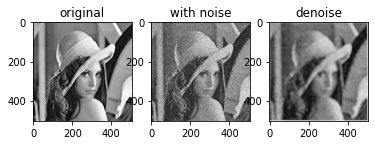

In [73]:
#逆谐波均值滤波器-高斯噪声-q=1
def IHMeanOperator(roi,q):
    roi=roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,kernel_size,q):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=IHMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2],q)
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


kernel_size=14
mean=0
sigma=0.21
q=1

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=IHMeanAlogrithm(lena_noise,kernel_size,q)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

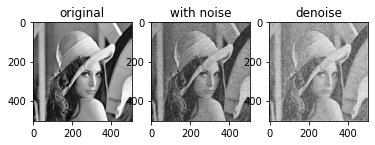

In [32]:
#逆谐波均值滤波器-高斯噪声-q=2
def IHMeanOperator(roi,q):
    roi=roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,kernel_size,q):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=IHMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2],q)
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


kernel_size=3
mean=0
sigma=0.21
q=2

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=IHMeanAlogrithm(lena_noise,kernel_size,q)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

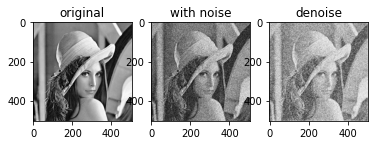

In [33]:
#逆谐波均值滤波器-高斯噪声-q=3
def IHMeanOperator(roi,q):
    roi=roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,kernel_size,q):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=IHMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2],q)
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


kernel_size=3
mean=0
sigma=0.21
q=3

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=IHMeanAlogrithm(lena_noise,kernel_size,q)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

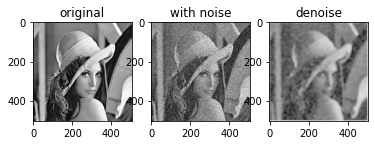

In [76]:
#逆谐波均值滤波器-椒盐噪声-q=1
def IHMeanOperator(roi,q):
    roi=roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,kernel_size,q):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=IHMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2],q)
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


proportion=0.18
kernel_size=14
lena_noise,noise=saltpepper_noise(lena,proportion)
q=1
lena_out=IHMeanAlogrithm(lena_noise,kernel_size,q)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

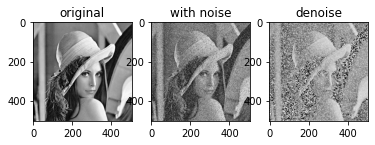

In [35]:
#逆谐波均值滤波器-椒盐噪声-q=2
def IHMeanOperator(roi,q):
    roi=roi.astype(np.float64)
    return np.mean((roi)**(q+1))/np.mean((roi)**(q))
def IHMeanAlogrithm(image,kernel_size,q):
    new_image=np.zeros(image.shape)
    image=cv2.copyMakeBorder(image,int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),int(kernel_size//2),cv2.BORDER_CONSTANT,value=(255,255,255))
    for i in range(kernel_size//2,image.shape[0]-kernel_size//2):
        for j in range(kernel_size//2,image.shape[1]-kernel_size//2):
            #take roi
            new_image[i-kernel_size//2,j-kernel_size//2]=IHMeanOperator(image[i-int(kernel_size//2):i+int(kernel_size//2)+kernel_size%2,j-int(kernel_size//2):j+int(kernel_size//2)+kernel_size%2],q)
    new_image=(new_image-np.min(image))*(255/np.max(image))
    return new_image.astype(np.uint8)


proportion=0.18
kernel_size=3
lena_noise,noise=saltpepper_noise(lena,proportion)
q=2
lena_out=IHMeanAlogrithm(lena_noise,kernel_size,q)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

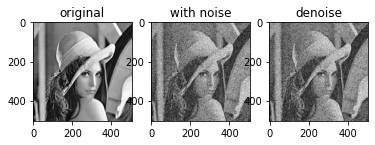

In [81]:
#自适应均值滤波器-高斯噪声
def self_adaptation_mean_filter(image,kernel_size,variance):
    edge_size=int(kernel_size/2)
    padding_img=np.pad(image,edge_size,'edge')
    
    height,width=image.shape
    
    image_after_filter=np.zeros_like(image,dtype='float64')
    
    for i in range(height):
        for j in range(width):
            box=padding_img[i:i+kernel_size,j:j+kernel_size]
            box_mean=np.mean(box)
            box_var=np.var(box)
            image_after_filter[i,j]=image[i,j]-(variance/box_var)*(image[i,j]-box_mean)
    return image_after_filter
kernel_size=14

mean=0.0
sigma=0.30

variance=30

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=self_adaptation_mean_filter(lena_noise,kernel_size,variance)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

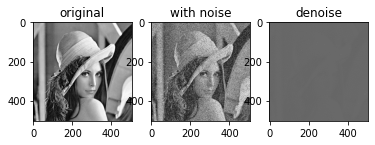

In [84]:
#自适应均值滤波器-椒盐噪声
def self_adaptation_mean_filter(image,kernel_size,variance):
    edge_size=int(kernel_size/2)
    padding_img=np.pad(image,edge_size,'edge')
    
    height,width=image.shape
    
    image_after_filter=np.zeros_like(image,dtype='float64')
    
    for i in range(height):
        for j in range(width):
            box=padding_img[i:i+kernel_size,j:j+kernel_size]
            box_mean=np.mean(box)
            box_var=np.var(box)
            image_after_filter[i,j]=image[i,j]-(variance/box_var)*(image[i,j]-box_mean)
    return image_after_filter


proportion=0.18
kernel_size=8
lena_noise,noise=saltpepper_noise(lena,proportion)

variance=10000

lena_out=self_adaptation_mean_filter(lena_noise,kernel_size,variance)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in ubyte_scalars


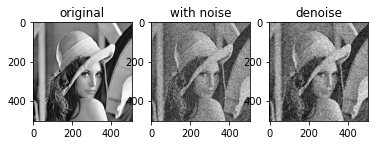

In [86]:
#自适应中值滤波器-高斯噪声
def self_adaptation_median_filter(image,kernel_size):
    
    
    height,width=image.shape
    
    image_after_filter=np.zeros_like(image,dtype='float64')
    
    for i in range(height):
        for j in range(width):
            rst=filter_process(image,kernel_size,i,j,7)
            image_after_filter[i,j]=rst
    return image_after_filter

def filter_process(image,kernel_size,i,j,s_max=7):
    edge_size=int(kernel_size/2)
    padding_img=np.pad(image,edge_size,'edge')
    
    box=padding_img[i:i+kernel_size,j:j+kernel_size]
    z_min=np.min(box)
    z_max=np.max(box)
    z_med=np.median(box)
    z_xy=image[i,j]
    
    rst=a_process(image,kernel_size,i,j,s_max,z_xy,z_min,z_max,z_med)
    
    return rst

def a_process(image,kernel_size,i,j,s_max,z_xy,z_min,z_max,z_med):
    A1=z_med-z_min
    A2=z_med-z_max
    
    if A1>0 and A2<0:
        return b_process(z_xy,z_min,z_max,z_med)
    elif (kernel_size+2)<=s_max:
        return filter_process(image,kernel_size+2,i,j,s_max)
    else:
        return z_med
def b_process(z_xy,z_min,z_max,z_med):
    B1=z_xy-z_min
    B2=z_xy-z_max
    if B1>0 and B2<0:
        return z_xy
    else:
        return z_med


kernel_size=4

mean=0.0
sigma=0.30

lena_noise,noise=gaussian_noise(lena,mean,sigma)
lena_out=self_adaptation_median_filter(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

E:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in ubyte_scalars


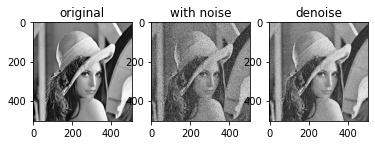

In [88]:
#自适应中值滤波器-椒盐噪声
def self_adaptation_median_filter(image,kernel_size):
    
    
    height,width=image.shape
    
    image_after_filter=np.zeros_like(image,dtype='float64')
    
    for i in range(height):
        for j in range(width):
            rst=filter_process(image,kernel_size,i,j,7)
            image_after_filter[i,j]=rst
    return image_after_filter

def filter_process(image,kernel_size,i,j,s_max=7):
    edge_size=int(kernel_size/2)
    padding_img=np.pad(image,edge_size,'edge')
    
    box=padding_img[i:i+kernel_size,j:j+kernel_size]
    z_min=np.min(box)
    z_max=np.max(box)
    z_med=np.median(box)
    z_xy=image[i,j]
    
    rst=a_process(image,kernel_size,i,j,s_max,z_xy,z_min,z_max,z_med)
    
    return rst

def a_process(image,kernel_size,i,j,s_max,z_xy,z_min,z_max,z_med):
    A1=z_med-z_min
    A2=z_med-z_max
    
    if A1>0 and A2<0:
        return b_process(z_xy,z_min,z_max,z_med)
    elif (kernel_size+2)<=s_max:
        return filter_process(image,kernel_size+2,i,j,s_max)
    else:
        return z_med
def b_process(z_xy,z_min,z_max,z_med):
    B1=z_xy-z_min
    B2=z_xy-z_max
    if B1>0 and B2<0:
        return z_xy
    else:
        return z_med


kernel_size=2

proportion=0.18
lena_noise,noise=saltpepper_noise(lena,proportion)

lena_out=self_adaptation_median_filter(lena_noise,kernel_size)

plt.subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,3,3)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

# 维纳滤波和约束最小二乘方滤波

https://blog.csdn.net/wsp_1138886114/article/details/95024180

(504, 504)
251.5
(504, 504)
251.5
(504, 504)
251.5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


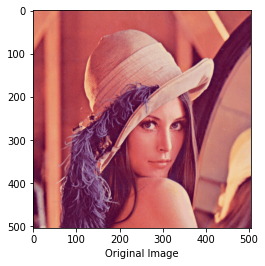

<Figure size 432x288 with 0 Axes>

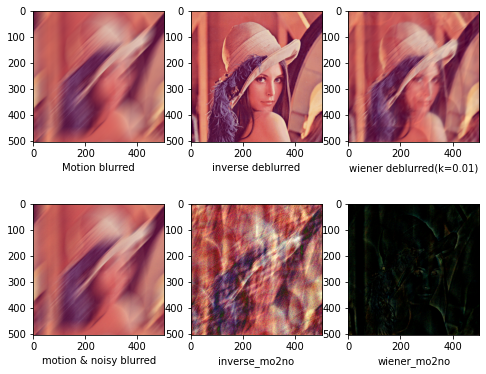

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import math
import cv2


# 仿真运动模糊
def motion_process(image_size, motion_angle):
    PSF = np.zeros(image_size)
    print(image_size)
    center_position = (image_size[0] - 1) / 2
    print(center_position)

    slope_tan = math.tan(motion_angle * math.pi / 180)
    slope_cot = 1 / slope_tan
    if slope_tan <= 1:
        for i in range(100):
            offset = round(i * slope_tan)  # ((center_position-i)*slope_tan)
            PSF[int(center_position + offset), int(center_position - offset)] = 1
        return PSF / PSF.sum()             # 对点扩散函数进行归一化亮度
    else:
        for i in range(100):
            offset = round(i * slope_cot)
            PSF[int(center_position - offset), int(center_position + offset)] = 1
        return PSF / PSF.sum()

# 对图片进行运动模糊
def make_blurred(input, PSF, eps):
    input_fft = fft.fft2(input)             # 进行二维数组的傅里叶变换
    PSF_fft = fft.fft2(PSF) + eps
    blurred = fft.ifft2(input_fft * PSF_fft)
    blurred = np.abs(fft.fftshift(blurred))
    return blurred

def inverse(input, PSF, eps):                # 逆滤波
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps            # 噪声功率，这是已知的，考虑epsilon
    result = fft.ifft2(input_fft / PSF_fft)  # 计算F(u,v)的傅里叶反变换
    result = np.abs(fft.fftshift(result))
    return result

def wiener(input, PSF, eps, K=0.01):        # 维纳滤波，K=0.01
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps
    PSF_fft_1 = np.conj(PSF_fft) / (np.abs(PSF_fft) ** 2 + K)
    result = fft.ifft2(input_fft * PSF_fft_1)
    result = np.abs(fft.fftshift(result))
    return result
    
def normal(array):
    array = np.where(array < 0,  0, array)
    array = np.where(array > 255, 255, array)
    array = array.astype(np.int16)
    return array

def main(gray):
    channel = []
    img_h, img_w = gray.shape[:2]
    PSF = motion_process((img_h, img_w), 60)      # 进行运动模糊处理
    blurred = np.abs(make_blurred(gray, PSF, 1e-3))

    result_blurred = inverse(blurred, PSF, 1e-3)  # 逆滤波
    result_wiener = wiener(blurred, PSF, 1e-3)    # 维纳滤波

    blurred_noisy = blurred + 0.1 * blurred.std() * \
                    np.random.standard_normal(blurred.shape)  # 添加噪声,standard_normal产生随机的函数
    inverse_mo2no = inverse(blurred_noisy, PSF, 0.1 + 1e-3)   # 对添加噪声的图像进行逆滤波
    wiener_mo2no = wiener(blurred_noisy, PSF, 0.1 + 1e-3)     # 对添加噪声的图像进行维纳滤波
    channel.append((normal(blurred),normal(result_blurred),normal(result_wiener),
                    normal(blurred_noisy),normal(inverse_mo2no),normal(wiener_mo2no)))
    return channel

if __name__ == '__main__':
    image = cv2.imread('./images/lenna.png')
    b_gray, g_gray, r_gray = cv2.split(image.copy())

    Result = []
    for gray in [b_gray, g_gray, r_gray]:
        channel = main(gray)
        Result.append(channel)
    blurred = cv2.merge([Result[0][0][0], Result[1][0][0], Result[2][0][0]])
    result_blurred = cv2.merge([Result[0][0][1], Result[1][0][1], Result[2][0][1]])
    result_wiener = cv2.merge([Result[0][0][2], Result[1][0][2], Result[2][0][2]])
    blurred_noisy = cv2.merge([Result[0][0][3], Result[1][0][3], Result[2][0][3]])
    inverse_mo2no = cv2.merge([Result[0][0][4], Result[1][0][4], Result[2][0][4]])
    wiener_mo2no = cv2.merge([Result[0][0][5],  Result[1][0][5], Result[2][0][5]])

    #========= 可视化 ==========
    plt.figure(1)
    plt.xlabel("Original Image")
    plt.imshow(np.flip(image, axis=2))                         # 显示原图像

    plt.figure(2)
    plt.figure(figsize=(8, 6.5))
    imgNames = {"Motion blurred":blurred,
                "inverse deblurred":result_blurred,
                "wiener deblurred(k=0.01)":result_wiener,
                "motion & noisy blurred":blurred_noisy,
                "inverse_mo2no":inverse_mo2no,
                'wiener_mo2no':wiener_mo2no-image}
    for i,(key,imgName) in enumerate(imgNames.items()):
        plt.subplot(231+i)
        plt.xlabel(key)
        plt.imshow(np.flip(imgName, axis=2), cmap='gray')
    plt.show()

## 小波变换

In [41]:
!pip install PyWavelets --user

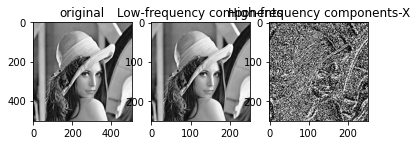

In [42]:
import cv2
import numpy as np
from pywt import dwt2, idwt2
 
# 读取灰度图
img =cv2.imread('./images/lenna.png',cv2.IMREAD_GRAYSCALE)
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('original')

# 对img进行haar小波变换：
cA,(cH,cV,cD)=dwt2(img,'haar')
 
# 小波变换之后，低频分量对应的图像：
plt.subplot(1,3,2)
plt.imshow(np.uint8(cA/np.max(cA)*255),cmap='gray')
plt.title('Low-frequency components')


# 小波变换之后，水平方向高频分量对应的图像：
plt.subplot(1,3,3)
plt.imshow(np.uint8(cH/np.max(cH)*255),cmap='gray')
plt.title('High-frequency components-X')


plt.show()

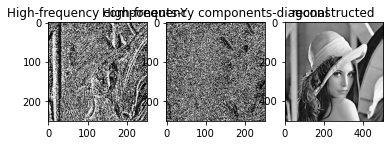

In [43]:
# 小波变换之后，垂直平方向高频分量对应的图像：
plt.subplot(1,3,1)
plt.imshow(np.uint8(cV/np.max(cV)*255),cmap='gray')
plt.title('High-frequency components-Y')


# 小波变换之后，对角线方向高频分量对应的图像：
plt.subplot(1,3,2)
plt.imshow(np.uint8(cD/np.max(cD)*255),cmap='gray')
plt.title('High-frequency components-diagonal')


# 根据小波系数重构回去的图像
plt.subplot(1,3,3)
plt.imshow(np.uint8(idwt2((cA,(cH,cV,cD)), 'haar')),cmap='gray')
plt.title('reconstructed')

plt.show()

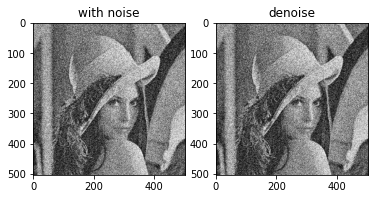

In [99]:
#小波变换单层分解
import pywt

mean=0
sigma=0.25
lena_noise,noise=gaussian_noise(lena,mean,sigma)

threshold=0.006
cA,(cH,cV,cD)=pywt.dwt2(lena_noise,'haar')

cA=pywt.threshold(cA,threshold*np.max(cA))
cH=pywt.threshold(cH,threshold*np.max(cH))
cV=pywt.threshold(cV,threshold*np.max(cV))
cD=pywt.threshold(cD,threshold*np.max(cD))

lena_out=np.uint8(pywt.idwt2((cA,(cH,cV,cD)), 'haar'))

plt.subplot(1,2,1)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,2,2)
plt.imshow(lena_out,cmap='gray')
plt.title('denoise')
plt.show()

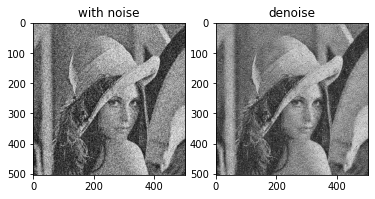

In [45]:
#小波变换多层变换
import pywt 
import numpy as np 
from cv2 import cv2
from PIL import Image

w = 'sym4' # 定义小波基的类型
l = 4 # 变换层次为4
coeffs = pywt.wavedec2(data=lena_noise, wavelet=w, level=l) # 对图像进行小波分解
threshold = 0.08

list_coeffs = []
for i in range(1, len(coeffs)):
    list_coeffs_ = list(coeffs[i])
    list_coeffs.append(list_coeffs_)

for r1 in range(len(list_coeffs)):
    for r2 in range(len(list_coeffs[r1])):
        # 对噪声滤波(软阈值)
        list_coeffs[r1][r2] = pywt.threshold(list_coeffs[r1][r2], threshold*np.max(list_coeffs[r1][r2])) 

rec_coeffs = [] # 重构系数
rec_coeffs.append(coeffs[0]) # 将原图像的低尺度系数保留进来

for j in range(len(list_coeffs)):
    rec_coeffs_ = tuple(list_coeffs[j])
    rec_coeffs.append(rec_coeffs_)

denoised_img = pywt.waverec2(rec_coeffs, 'sym4')
denoised_img = Image.fromarray(np.uint8(denoised_img))
plt.subplot(1,2,1)
plt.imshow(lena_noise,cmap='gray')
plt.title('with noise')
plt.subplot(1,2,2)
plt.imshow(denoised_img,cmap='gray')
plt.title('denoise')
plt.show()

In [55]:
#对比单层变换和多层变换
mean=0
sigma=0.25
lena_noise,noise=gaussian_noise(lena,mean,sigma)
threshold=0.004

#单层
cA,(cH,cV,cD)=pywt.dwt2(lena_noise,'haar')

cA=pywt.threshold(cA,threshold*np.max(cA))
cH=pywt.threshold(cH,threshold*np.max(cH))
cV=pywt.threshold(cV,threshold*np.max(cV))
cD=pywt.threshold(cD,threshold*np.max(cD))

lena_out_single=np.uint8(pywt.idwt2((cA,(cH,cV,cD)), 'haar'))

#多层
w = 'haar' # 定义小波基的类型
l = 1 # 变换层次为1
coeffs = pywt.wavedec2(data=lena_noise, wavelet=w, level=l) # 对图像进行小波分解
list_coeffs = []
for i in range(1, len(coeffs)):
    list_coeffs_ = list(coeffs[i])
    list_coeffs.append(list_coeffs_)

for r1 in range(len(list_coeffs)):
    for r2 in range(len(list_coeffs[r1])):
        # 对噪声滤波(软阈值)
        list_coeffs[r1][r2] = pywt.threshold(list_coeffs[r1][r2], threshold*np.max(list_coeffs[r1][r2])) 

rec_coeffs = [] # 重构系数
rec_coeffs.append(coeffs[0]) # 将原图像的低尺度系数保留进来

for j in range(len(list_coeffs)):
    rec_coeffs_ = tuple(list_coeffs[j])
    rec_coeffs.append(rec_coeffs_)

denoised_img = pywt.waverec2(rec_coeffs, 'haar')
denoised_img=np.uint8(denoised_img)
#denoised_img = Image.fromarray(np.uint8(denoised_img))

In [56]:
lena_out_single

array([[166, 143, 127, ..., 137,  34,  67],
       [186, 141, 253, ...,  66,   0, 252],
       [154, 164, 121, ...,  68, 109, 178],
       ...,
       [  0,  54,  20, ..., 175,  44, 157],
       [ 82,   0, 109, ...,  87,   0, 173],
       [  0,   0,  72, ...,   0,   0,   0]], dtype=uint8)

In [57]:
denoised_img

array([[167, 144, 128, ..., 138,  35,  68],
       [187, 142, 254, ...,  67,   0, 253],
       [155, 165, 122, ...,  69, 110, 179],
       ...,
       [  1,  55,  21, ..., 176,  45, 158],
       [ 83,   0, 110, ...,  88,   0, 174],
       [  0,   0,  73, ...,   0,   0,   0]], dtype=uint8)